# 1. Import Libraries

In [1]:
import os
import pandas as pd
import requests
from io import StringIO
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Load data

* Define all files url
* Write function to read csv from Github url
* Save to DataFrame


In [2]:
annex1 = 'https://raw.githubusercontent.com/prattapong/Data-Science-Portfolio/main/Projects/Supermaket%20Sales%20Data/data/annex1.csv'
annex2 = 'https://raw.githubusercontent.com/prattapong/Data-Science-Portfolio/main/Projects/Supermaket%20Sales%20Data/data/annex2.csv'
annex3 = 'https://raw.githubusercontent.com/prattapong/Data-Science-Portfolio/main/Projects/Supermaket%20Sales%20Data/data/annex3.csv'
annex4 = 'https://raw.githubusercontent.com/prattapong/Data-Science-Portfolio/main/Projects/Supermaket%20Sales%20Data/data/annex4.csv'

In [3]:
def get_df_from_url(url):
    response = requests.get(url)

    # Check if the request was successful (status code 200)
    if response.status_code == 200:
        # Create a file-like object from the raw content
        csv_content = StringIO(response.text)

        # Read the CSV file into a DataFrame
        df = pd.read_csv(csv_content)

        # Return DataFrame
        return df
    else:
        print(f"Failed to fetch data. Status code: {response.status_code}")

In [4]:
df_item = get_df_from_url(annex1)
df_transaction = get_df_from_url(annex2)
df_wholesale = get_df_from_url(annex3)
df_loss = get_df_from_url(annex4)

# 3. Merge data

In [5]:
def merge_all_df(df_transaction: pd.DataFrame = df_transaction,
                 df_item: pd.DataFrame = df_item,
                 df_wholesale: pd.DataFrame = df_wholesale,
                 df_loss: pd.DataFrame = df_loss):

    df_merge = df_transaction.merge(df_item,
                                    how = 'left',
                                    on = 'Item Code')
    df_merge = df_merge.merge(df_wholesale,
                            how = 'left',
                            on = ['Date', 'Item Code'])
    df_merge = df_merge.merge(df_loss.drop('Item Name', axis = 1),
                            how = 'left',
                            on = 'Item Code')
    
    return df_merge

In [6]:
df_merge = merge_all_df()
df_merge.head()

,Date,Time,Item Code,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Sale or Return,Discount (Yes/No),Item Name,Category Code,Category Name,Wholesale Price (RMB/kg),Loss Rate (%)
0,2020-07-01,09:15:07.924,102900005117056,0.396,7.6,sale,No,Paopaojiao (Jingpin),1011010504,Capsicum,4.32,7.08
1,2020-07-01,09:17:27.295,102900005115960,0.849,3.2,sale,No,Chinese Cabbage,1011010101,Flower/Leaf Vegetables,2.10,22.27
2,2020-07-01,09:17:33.905,102900005117056,0.409,7.6,sale,No,Paopaojiao (Jingpin),1011010504,Capsicum,4.32,7.08
3,2020-07-01,09:19:45.450,102900005115823,0.421,10.0,sale,No,Shanghaiqing,1011010101,Flower/Leaf Vegetables,7.03,14.43
4,2020-07-01,09:20:23.686,102900005115908,0.539,8.0,sale,No,Caixin,1011010101,Flower/Leaf Vegetables,4.60,13.70


# 3. EDA

## 3.1 Statistical Summary

In [7]:
if df_item.shape[0] == df_item['Item Code'].nunique():
    print('Item Code has no duplication')
else:
    print(df_item.shape[0], df_item['Item Code'].nunique())

Item Code has no duplication


In [8]:
# Check whether every item has only 1 price in one day or not
df_wholesale.groupby(['Item Code', 'Date'], as_index = False).count().sort_values(by = 'Wholesale Price (RMB/kg)', ascending = False).head()

,Item Code,Date,Wholesale Price (RMB/kg)
0,102900005115168,2020-10-30,1
37324,102900011016909,2022-07-13,1
37313,102900011016909,2022-06-27,1
37314,102900011016909,2022-06-28,1
37315,102900011016909,2022-06-29,1


In [9]:
display(df_merge.describe(include = 'all'))

,Date,Time,Item Code,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Sale or Return,Discount (Yes/No),Item Name,Category Code,Category Name,Wholesale Price (RMB/kg),Loss Rate (%)
count,878503,878503,8.785030e+05,878503.000000,878503.000000,878503,878503,878503,8.785030e+05,878503,878503.000000,878503.000000
unique,1085,849632,NaN,NaN,NaN,2,2,242,NaN,6,NaN,NaN
top,2021-02-10,10:05:12.655,NaN,NaN,NaN,sale,No,Wuhu Green Pepper (1),NaN,Flower/Leaf Vegetables,NaN,NaN
freq,3747,6,NaN,NaN,NaN,878042,831137,69945,NaN,331968,NaN,NaN
mean,NaN,NaN,1.030313e+14,0.536112,8.917144,NaN,NaN,NaN,1.011010e+09,NaN,5.663150,10.122526
std,NaN,NaN,7.174368e+11,0.400087,6.311265,NaN,NaN,NaN,2.582929e+02,NaN,4.229638,4.741439
min,NaN,NaN,1.029000e+14,-9.082000,0.100000,NaN,NaN,NaN,1.011010e+09,NaN,0.010000,0.000000
25%,NaN,NaN,1.029000e+14,0.290000,4.900000,NaN,NaN,NaN,1.011010e+09,NaN,3.000000,6.270000
50%,NaN,NaN,1.029000e+14,0.435000,7.900000,NaN,NaN,NaN,1.011010e+09,NaN,4.690000,9.430000
75%,NaN,NaN,1.029000e+14,0.742000,10.800000,NaN,NaN,NaN,1.011011e+09,NaN,7.010000,13.620000


In [10]:
df_merge.dtypes

Date                            object
Time                            object
Item Code                        int64
Quantity Sold (kilo)           float64
Unit Selling Price (RMB/kg)    float64
Sale or Return                  object
Discount (Yes/No)               object
Item Name                       object
Category Code                    int64
Category Name                   object
Wholesale Price (RMB/kg)       float64
Loss Rate (%)                  float64
dtype: object

## 3.2 Check missing values

* Check whether there is any null in any rows
* Since it is a time series, we also need to check whether all datapoints are collected. Therefore, we check for the missing date in each category

In [11]:
print(f'Total null rows: {df_merge.isna().sum().sum()}')
if df_merge.isna().sum().sum() > 0:
    print(df_merge.isna().sum())
else:
    pass

Total null rows: 0


In [12]:
def get_category_max_min_date(df: pd.DataFrame,
                              category_name: str):
    
    # Slice DataFrame to Category Name
    df = df[df['Category Name'] == category_name]

    max_date = df['Date'].max()
    min_date = df['Date'].min()

    print(f'Category: {category_name}')
    print(f'Max date: {max_date} | Min date: {min_date}')

    date_range = pd.date_range(start=min_date, end=max_date, freq='D')

    # Find the missing dates
    missing_dates = date_range[~date_range.isin(df['Date'])]

    # Display the missing dates
    print(f'Number of Missing Dates: {len(missing_dates)}')

In [13]:
num_category = df_merge['Category Code'].nunique()
categories = df_merge['Category Name'].unique()
print(f'Total Category: {num_category}\nCategory lists:\n{categories}')

Total Category: 6
Category lists:
['Capsicum' 'Flower/Leaf\xa0Vegetables' 'Aquatic Tuberous Vegetables'
 'Edible Mushroom' 'Cabbage' 'Solanum']


In [14]:
for category in categories:
    get_category_max_min_date(df = df_merge,
                              category_name = category)

Category: Capsicum
Max date: 2023-06-30 | Min date: 2020-07-01
Number of Missing Dates: 10
Category: Flower/Leaf Vegetables
Max date: 2023-06-30 | Min date: 2020-07-01
Number of Missing Dates: 10
Category: Aquatic Tuberous Vegetables
Max date: 2023-06-30 | Min date: 2020-07-01
Number of Missing Dates: 10
Category: Edible Mushroom
Max date: 2023-06-30 | Min date: 2020-07-01
Number of Missing Dates: 10
Category: Cabbage
Max date: 2023-06-30 | Min date: 2020-07-01
Number of Missing Dates: 11
Category: Solanum
Max date: 2023-06-30 | Min date: 2020-07-01
Number of Missing Dates: 45


## 3.3 Aggregate for daily category sales

In [15]:
# Create Sales column
df_merge['Sales'] = df_merge['Unit Selling Price (RMB/kg)'] * df_merge['Quantity Sold (kilo)']

# Aggregate as new table
df_agg = df_merge.groupby(['Date', 'Category Name', 'Discount (Yes/No)', 'Wholesale Price (RMB/kg)'], as_index = False)['Sales'].sum()
df_agg.head()

,Date,Category Name,Discount (Yes/No),Wholesale Price (RMB/kg),Sales
0,2020-07-01,Aquatic Tuberous Vegetables,No,5.65,41.1900
1,2020-07-01,Aquatic Tuberous Vegetables,No,29.43,29.0938
2,2020-07-01,Cabbage,No,6.03,108.7740
3,2020-07-01,Cabbage,No,9.23,483.7560
4,2020-07-01,Capsicum,No,4.32,414.5648


## 3.4 Address Outliers in each Category

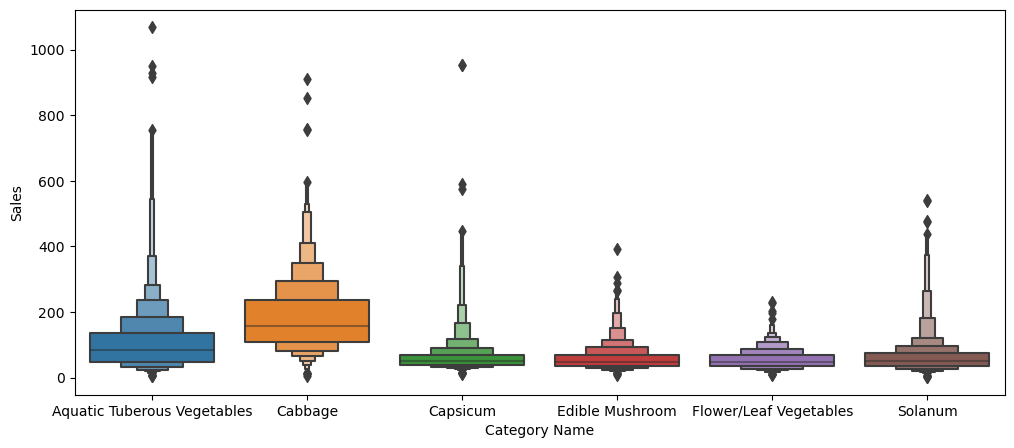

In [16]:
plt.figure(figsize=(12,5))
sns.boxenplot(data = df_agg.groupby(['Category Name', 'Date'], as_index = False)['Sales'].mean(),
              x = 'Category Name',
              y = 'Sales')
plt.show()

In [17]:
def get_outlier_rows(df: pd.DataFrame,
                     col: str,
                     category_name: str):
    
    # Slice DataFrame to Category Name
    df = df[df['Category Name'] == category_name]
    
    # Calculate quartile
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)

    # Calculate the IQR (Interquartile Range)
    IQR = Q3 - Q1

    # Define the lower and upper bounds to identify outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    # Print out
    print(f'Column name: {col} | Category: {category_name}')
    print(f'Total rows: {df.shape[0]} | Outliers: {outliers.shape[0]}')
    display(outliers.sort_values(by = col, ascending = False).head())

In [18]:
for category in categories:
    get_outlier_rows(df = df_agg,
                     col = 'Sales',
                     category_name = category)

Column name: Sales | Category: Capsicum
Total rows: 12376 | Outliers: 1382


,Date,Category Name,Discount (Yes/No),Wholesale Price (RMB/kg),Sales
10579,2021-02-10,Capsicum,No,8.86,3999.5840
10586,2021-02-10,Capsicum,No,17.10,3392.5512
10530,2021-02-09,Capsicum,No,8.86,3076.2760
26133,2022-01-30,Capsicum,No,9.62,2603.7480
10533,2021-02-09,Capsicum,No,17.04,2392.4856


Column name: Sales | Category: Flower/Leaf Vegetables
Total rows: 20187 | Outliers: 1303


,Date,Category Name,Discount (Yes/No),Wholesale Price (RMB/kg),Sales
41569,2022-11-21,Flower/Leaf Vegetables,No,2.00,1220.000
32210,2022-06-09,Flower/Leaf Vegetables,No,3.27,944.000
44375,2023-01-20,Flower/Leaf Vegetables,No,2.97,772.800
2799,2020-08-25,Flower/Leaf Vegetables,No,2.98,746.492
44575,2023-01-26,Flower/Leaf Vegetables,No,8.94,630.880


Column name: Sales | Category: Aquatic Tuberous Vegetables
Total rows: 3705 | Outliers: 282


,Date,Category Name,Discount (Yes/No),Wholesale Price (RMB/kg),Sales
10574,2021-02-10,Aquatic Tuberous Vegetables,No,9.57,2357.472
10572,2021-02-10,Aquatic Tuberous Vegetables,No,8.50,1689.900
26125,2022-01-30,Aquatic Tuberous Vegetables,No,9.22,1519.700
10524,2021-02-09,Aquatic Tuberous Vegetables,No,8.62,1496.400
26025,2022-01-28,Aquatic Tuberous Vegetables,No,9.00,1346.292


Column name: Sales | Category: Edible Mushroom
Total rows: 11135 | Outliers: 1287


,Date,Category Name,Discount (Yes/No),Wholesale Price (RMB/kg),Sales
10601,2021-02-10,Edible Mushroom,No,14.09,2734.0906
10549,2021-02-09,Edible Mushroom,No,13.68,1951.5474
44359,2023-01-20,Edible Mushroom,No,3.65,1563.5000
26148,2022-01-30,Edible Mushroom,No,13.00,1427.5872
10496,2021-02-08,Edible Mushroom,No,14.41,1211.2650


Column name: Sales | Category: Cabbage
Total rows: 2225 | Outliers: 74


,Date,Category Name,Discount (Yes/No),Wholesale Price (RMB/kg),Sales
35937,2022-08-19,Cabbage,No,4.67,1217.056
44339,2023-01-20,Cabbage,No,6.83,1210.476
44509,2023-01-25,Cabbage,No,7.19,1033.632
26127,2022-01-30,Cabbage,No,6.20,980.700
26082,2022-01-29,Cabbage,No,6.13,909.070


Column name: Sales | Category: Solanum
Total rows: 3308 | Outliers: 143


,Date,Category Name,Discount (Yes/No),Wholesale Price (RMB/kg),Sales
10621,2021-02-10,Solanum,No,8.76,1313.160
26121,2022-01-29,Solanum,No,10.37,1174.986
10569,2021-02-09,Solanum,No,8.50,1003.356
26167,2022-01-30,Solanum,No,11.37,991.998
44392,2023-01-20,Solanum,No,8.04,958.930


## 3.4 Visualize

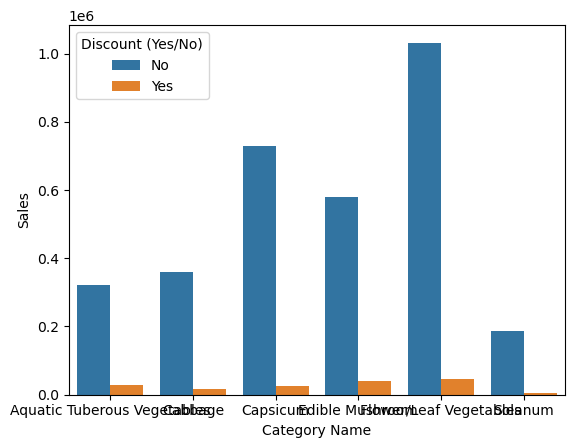

Discount (Yes/No),No,Yes
Category Name,,
Aquatic Tuberous Vegetables,92.267250,7.732750
Cabbage,95.482615,4.517385
Capsicum,96.606428,3.393572
Edible Mushroom,93.473774,6.526226
Flower/Leaf Vegetables,95.629558,4.370442
Solanum,97.967356,2.032644


In [19]:
sns.barplot(data = df_agg.groupby(['Category Name','Discount (Yes/No)'], as_index = False)['Sales'].sum(),
            x = 'Category Name',
            y = 'Sales',
            hue = 'Discount (Yes/No)')
plt.show()

grouped_df = df_agg.groupby(['Category Name', 'Discount (Yes/No)'], as_index=False)['Sales'].sum()

# Calculate percentages within each 'Category Name' group
grouped_df['Percentage'] = grouped_df.groupby('Category Name')['Sales'].transform(lambda x: x / x.sum() * 100)
display(grouped_df.pivot_table(index = 'Category Name',
                       columns = 'Discount (Yes/No)',
                       values = 'Percentage'))

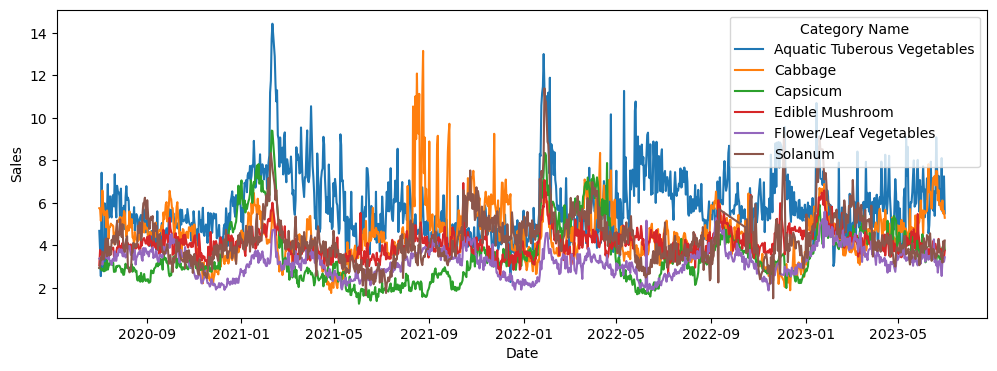

In [20]:
df_merge['Date'] = pd.to_datetime(df_merge['Date'])

plt.figure(figsize = (12, 4))
sns.lineplot(df_merge.groupby(['Category Name','Date'], as_index = False)['Sales'].mean(),
            x = 'Date',
            y = 'Sales',
            hue = 'Category Name')
plt.show()

In [24]:
def get_date_dimension(df: pd.DataFrame,
                       date_column: str):
    # Convert the 'Date' column to datetime type
    df['Date'] = pd.to_datetime(df['Date'])

    # Extract date components
    df['Year'] = df['Date'].dt.year
    df['Month'] = df['Date'].dt.month
    df['Day'] = df['Date'].dt.day
    df['DayOfWeek'] = df['Date'].dt.dayofweek  # Monday is 0 and Sunday is 6
    df['DayName'] = df['Date'].dt.day_name()
    df['WeekNumber'] = df['Date'].dt.isocalendar().week
    df['Quarter'] = df['Date'].dt.quarter

    return df

df_agg = get_date_dimension(df = df_agg,
                            date_column = 'Date')
df_agg.head()

,Date,Category Name,Discount (Yes/No),Wholesale Price (RMB/kg),Sales,Year,Month,Day,DayOfWeek,DayName,WeekNumber,Quarter
0,2020-07-01,Aquatic Tuberous Vegetables,No,5.65,41.1900,2020,7,1,2,Wednesday,27,3
1,2020-07-01,Aquatic Tuberous Vegetables,No,29.43,29.0938,2020,7,1,2,Wednesday,27,3
2,2020-07-01,Cabbage,No,6.03,108.7740,2020,7,1,2,Wednesday,27,3
3,2020-07-01,Cabbage,No,9.23,483.7560,2020,7,1,2,Wednesday,27,3
4,2020-07-01,Capsicum,No,4.32,414.5648,2020,7,1,2,Wednesday,27,3
